In [2]:
#@title Librerias
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

# Laboratorio #2.

**Punto #1** Supongamos que un conjunto de características y datos etiquetados estan dados de la siguiente manera:

Crear un data frame de pandas con los siguientes datos:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|


In [9]:
df = pd.DataFrame() # Se inicializa un dataframe vacio
df['Entrenamiento'] = [0, 1, 2, 3, 4, 'm'] # Se crea la columna de entrenamiento y se anexan los valores solicitados
df['Y'] = [n for n in range(0,6)] # Para la columna Y se hace una comprenhension list
df['X_1'] = [n for n in range(0,6)] # Para la columna X_1 se hace una comprenhension list
df

,Entrenamiento,Y,X_1
0,0,0,0
1,1,1,1
2,2,2,2
3,3,3,3
4,4,4,4
5,m,5,5


**Punto #2** Crear una función para calcular la función de coste.

Notas sobre la teoría (Regresión lineal):

Se puede definir un modelo lineal como: $h(X) = \theta_0 + \theta_1 X$ con $(\theta_0, \theta_1)$ parámetros. El objetivo es encontrar el conjunto de puntos $(\theta_0, \theta_1)$ que se encuentre más cercano a los valores de $Y$ para cada $X$.

Para la optimización, se define la función de coste $J(\theta_0, \theta_1)$ como aquella que garantiza la distancia euclideana respecto a la hipótesis planteada.

Se define la función de coste como:

$$ J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i=0}^{m}(h_\theta(x^{(i)}) - Y^{(i)})^2$$.

Para hacer el calculo de la función de coste, primero se hace un procedimiento de vectorización.

$$\vec{h}(\theta_0, \theta_1) = \begin{pmatrix} \theta_0 & \theta_1 \end{pmatrix}_{1x2} \begin{pmatrix} 1& 1 & \cdots & 1\\
x^{(1)} & x^{(2)} & \cdots & x^{(m)}
\end{pmatrix}_{2xm}$$

De donde se puede verificar mediante el producto de matrices que:

$$\vec{h}(\theta_0, \theta_1) = \begin{pmatrix} \theta_0 + \theta_1 x^{(1)} & \theta_0 + \theta_1 x^{(2)} & \cdots & \theta_0 + \theta_1 x^{(m)}  \end{pmatrix}$$

Así mismo, se plantea que el valor esperado:

$$\vec{Y}_{esperado} =  \begin{pmatrix} Y^{(0)} & Y^{(1)} & \cdots & Y^{(m)} \end{pmatrix}$$





In [40]:
# Creemos una función que permita calcular la función de coste.

def H(theta0, theta1, df):
  var = np.array([theta0, theta1]) # Se introduce en un array los valores a optimizar
  matriz = np.array([[1 for i in range(0, len(df['X_1']))], df['X_1']]) # Se crea una matriz en donde los primeros valores son 1, los siguientes valores pertenecen a los X del dataframe
  h = var @ matriz # Se realiza el producto matricial
  return h

def Coste(theta0, theta1, df):
  """
    Calcula la funcion de coste para un solo valor de theta0 y un espectro de valores
    de theta1.

    INPUTS:
      theta0 (float): una semilla para theta0
      theta1 (float): una semilla para theta1
      df (DataFrame): representa el dataframe sobre el cual se calcularan los datos

    OUTPUT:
      sup (array): tiene los valores de la funcion de coste para cada valor de theta1
  """
  sup = np.zeros(theta1*2) # Se crea un arreglo de ceros
  k = 0 # Se inicializa un contador
  for i in range(-theta1, theta1): # Se hace un for que recorre entre -eval y eval
    coste = (1/(2* ( 2 * theta1))) * (H(theta0, i, df) - df['Y'])**2 # Se calcula la funcion de coste
    sup[k] = coste.mean() # Se añade al arreglo de ceros el valor medio
    k += 1
  return sup # Se retorna un array que tiene los valores de la funcion de coste

**Punto #3**: Asumiendo $\theta_0=0$, encuentre una representacion de gráfica de la función de coste para diferentes valores de  $\theta_1$, ¿Cuál es el mínimo de la función de coste?, con este valor, grafique sobre los datos del dataframe construido la ecuación y regresión encontrada.

El minimo de la funcion de coste es 0.0


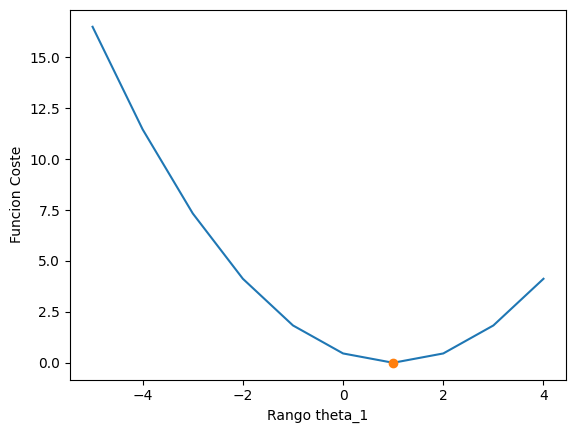

In [44]:
# Se asume theta0 = 0 y theta1 = 5 esto da el espectro [-5, -4, ..., 0, 1, ..., 4, 5]
coste_eval = Coste(0, 5, df)
min_val = min(coste_eval)
print(f'El minimo de la funcion de coste es {min_val}')
a = np.where(coste_eval == min_val)[0][0]

plt.plot(range(-5,5), coste_eval)
plt.xlabel('Rango theta_1')
plt.ylabel('Funcion Coste')
plt.plot(range(-5,5)[a],coste_eval[a], 'o')

**Punto #4**: Suponiendo ahora que los datos de entrenamiento viene dados de la siguiente manera:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|

Encontrar la función de coste para diferentes valores de $\theta_0$, $\theta_1$.
Para ello puede emplar los metodos surface y contour dentro de la libreria de matplotlib.  Construya primero con los valores de $\theta_0$, $\theta_1 $ definidos un (np.mesgrid) y evalue  para cada punto $\theta_0$, $\theta_1$ la función de coste.

Para el gráfico 3D puede emplear algo similar a las siguientes lineas de código

```
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot_surface(t0, t1, J )
ax.contour(t0, t1, J, 200,   linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.show()
```


En los casos anteriores la solución solo involucra 1 y 2 parámetros para la representación de la función de coste en  2D y 3D respectivamente. Cuando se tienen más parametros a optmizar, no podemos tener una representacion gráfica análoga a los casos anteriores. Notese además que los datos anteriores no tiene ningún ruido y solo estan realizados de esta manera por motivos didácticos.

In [48]:
theta0 = np.linspace(-10,10, num=500)
theta1 = np.linspace(-10,10, num=500)
matriz = np.zeros( ( 500, 500 ) )

# Usar enumerate.
i1 = 0
j1 = 0
for i in enumerate(theta0):
  for j in enumerate(theta1):
    coste = (1/(2)) * (H(i[1], j[1], df) - df['Y'])**2
    matriz[i[0],j[0]] = coste.mean()


<ipython-input-49-f95446f1739a>:6: UserWarning: The following kwargs were not used by contour: 'linesstyle'
  ax.contour(xx, yy, matriz, 100, linesstyle='solid')


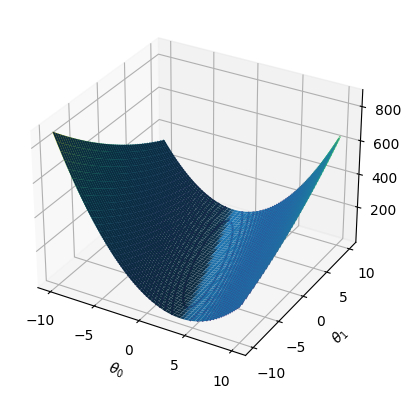

In [49]:
xx, yy = np.meshgrid(theta0, theta1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, matriz)
ax.contour(xx, yy, matriz, 100, linesstyle='solid')
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.show()

**Punto #5**: Encontrar la expresión teórica para la función de coste en el caso 1D y 2D.


Para el caso 1D:

$$J(\theta_1) = \frac{1}{2m}\sum_{i=0}^{m}( (\theta_1 X) - Y^{(i)} )^2$$

Para el caso 2D:

$$J(\theta_0,\theta_1) = \frac{1}{2m}\sum_{i=0}^{m}( (\theta_0 + \theta_1 X) - Y^{(i)} )^2$$